In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df2017 = pd.read_csv(r"C:\Users\DELL-PC\Documents\real-world-dataset\Stackoverflow survey from 2015 to 2021\Datasets\2017 public.csv", low_memory = False)
df2018 = pd.read_csv(r"C:\Users\DELL-PC\Documents\real-world-dataset\Stackoverflow survey from 2015 to 2021\Datasets\2018 public.csv", low_memory = False)
df2019 = pd.read_csv(r"C:\Users\DELL-PC\Documents\real-world-dataset\Stackoverflow survey from 2015 to 2021\Datasets\2019 public.csv", low_memory = False)
df2020 = pd.read_csv(r"C:\Users\DELL-PC\Documents\real-world-dataset\Stackoverflow survey from 2015 to 2021\Datasets\2020 public.csv", low_memory = False)
df2021 = pd.read_csv(r"C:\Users\DELL-PC\Documents\real-world-dataset\Stackoverflow survey from 2015 to 2021\Datasets\2021 public.csv", low_memory = False)

In [3]:
df2017['Year'] = [2017]*len(df2017)
df2018['Year'] = [2018]*len(df2018)
df2019['Year'] = [2019]*len(df2019)
df2020['Year'] = [2020]*len(df2020)
df2021['Year'] = [2021]*len(df2021)

In [4]:
dfs = [df2017, df2018, df2019, df2020, df2021]

In [5]:
for df in dfs:
    df.columns.tolist()
    print(df.columns)

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'Gender', 'HighestEducationParents', 'Race', 'SurveyLong',
       'QuestionsInteresting', 'QuestionsConfusing', 'InterestedAnswers',
       'Salary', 'ExpectedSalary', 'Year'],
      dtype='object', length=155)
Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Gender', 'SexualOrientation', 'EducationParents', 'RaceEthnicity',
       'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong', 'SurveyEasy',
       'Year'],
      dtype='object', length=130)
Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodeP

### Explore data
- ~~Gender changes over years~~
- ~~Countries changes over years~~
- ~~Years of Code ((compare 3 years)~~
- ~~1stAge of devs (barh and histogram) 2021~~
- ~~Survey Ease exploratory~~
- ~~Age of devs (histogram and line chart) 2021~~
- ~~Language have worked with (barh)~~
- ~~MiscTechHaveWorkedWith~~
- ~~ToolsTechWantToWorkWith~~
- DatabaseWantToWorkWith

#### Gender compare

In [6]:
df2021.Gender.value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              21
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:        

In [7]:
gender_d = {}

gender_d['Year'] = [df.Year[0] for df in dfs]
gender_d['Male'] = [df.Gender.value_counts()[0] for df in dfs]
gender_d['Female'] = [df.Gender.value_counts()[1] for df in dfs]
    
gender_df = pd.DataFrame(gender_d)
gender_df

,Year,Male,Female
0,2017,31589,2600
1,2018,59458,4025
2,2019,77919,6344
3,2020,46013,3844
4,2021,74817,4120


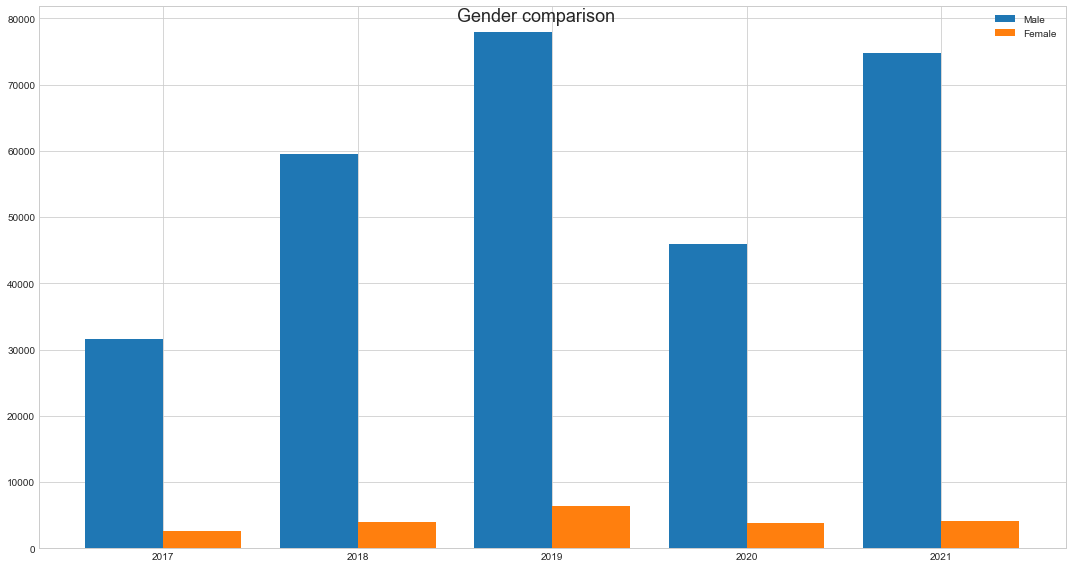

In [8]:
plt.style.use('seaborn-whitegrid')
fig1, ax1 = plt.subplots(figsize = (15, 8))
def multiple_bars(figure, xaxis, values, labels, width = 0.8):
    x = np.arange(len(xaxis))
    n = len(values)
    for i in range(n):
        figure.bar(x - width/2 + i/n*width, values[i], width/n, label = labels[i])
    plt.xticks(x - width/(2*n), xaxis)
    
multiple_bars(ax1, gender_df.Year, [gender_df.Male, gender_df.Female], labels = ['Male', 'Female'])
fig1.tight_layout()
fig1.suptitle('Gender comparison', fontsize = 18)
plt.legend()
plt.show()
        

#### Countries compare

In [9]:
country_d = {}
for df in dfs:
    print(df['Country'].value_counts()[:4])

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Name: Country, dtype: int64
United States     20309
India             13721
Germany            6459
United Kingdom     6221
Name: Country, dtype: int64
United States     20949
India              9061
Germany            5866
United Kingdom     5737
Name: Country, dtype: int64
United States     12469
India              8403
United Kingdom     3896
Germany            3890
Name: Country, dtype: int64
United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Name: Country, dtype: int64


In [10]:
df2021.Country.replace(to_replace = 'United States of America', value = 'United States', inplace = True)
df2021.Country.replace(to_replace = 'United Kingdom of Great Britain and Northern Ireland', value = 'United Kingdom', inplace = True)

In [11]:
def get_countries_number(dfr, year):
    country_dict = {}
    country_dict['Year'] = year
    country_dict['United States'] = len(dfr[dfr['Country'] == 'United States'])
    country_dict['India'] = len(dfr[dfr['Country'] == 'India'])
    country_dict['United Kingdom'] = len(dfr[dfr['Country'] == 'United Kingdom'])
    country_dict['Germany'] = len(dfr[dfr['Country'] == 'Germany'])
    return country_dict

def make_df(dictionary):
    l = [dictionary]
    dataframe = pd.DataFrame(l)
    return dataframe

In [12]:
countries = ['United States', 'India', 'United Kingdom', 'Germany']
years = [2017, 2018, 2019, 2020, 2021]
country_d = {}
# for country in countries:
    
    

In [13]:
country_df_list = [get_countries_number(dfs[i], years[i]) for i in range(5)]
country_df_list = [make_df(d) for d in country_df_list]
year_ctry_df = pd.concat(country_df_list, ignore_index = True)
year_ctry_df

,Year,United States,India,United Kingdom,Germany
0,2017,11455,5197,4395,4143
1,2018,20309,13721,6221,6459
2,2019,20949,9061,5737,5866
3,2020,12469,8403,3896,3890
4,2021,15288,10511,4475,5625


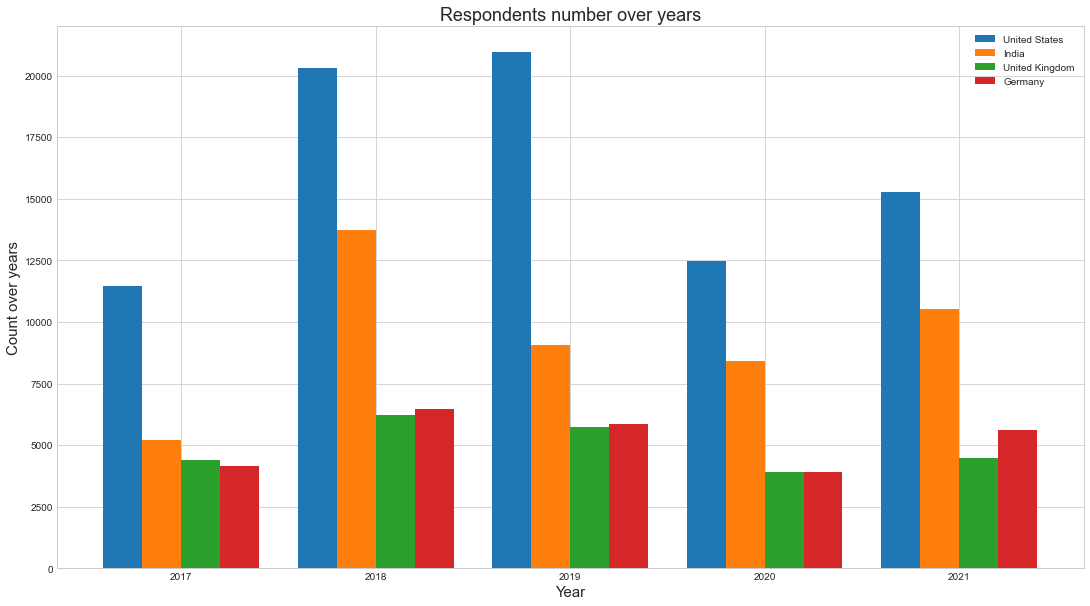

In [14]:
# Visualize the trend of respondents from other countries
plt.style.use(style = 'seaborn-whitegrid')
fig2, ax2 = plt.subplots(figsize = (15, 8))

values2 = [
          year_ctry_df['United States'],
          year_ctry_df['India'],
          year_ctry_df['United Kingdom'],
          year_ctry_df['Germany'],
]

multiple_bars(ax2, year_ctry_df.Year, values2, labels = countries)

fig2.tight_layout()
plt.legend()

ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Count over years', fontsize = 15)
ax2.set_title('Respondents number over years', fontsize = 18)
plt.show()


#### Years of Code trends

In [15]:
df2021 = df2021.replace(to_replace = 'More than 50 years', value = 51, regex = False)
df2021 = df2021.replace(to_replace = 'Less than 1 year', value = 0.5, regex = False)

df2020 = df2020.replace(to_replace = 'More than 50 years', value = 51, regex = False)
df2020 = df2020.replace(to_replace = 'Less than 1 year', value = 0.5, regex = False)


df2019 = df2019.replace(to_replace = 'More than 50 years', value = 51, regex = False)
df2019 = df2019.replace(to_replace = 'Less than 1 year', value = 0.5, regex = False)


In [16]:
def year_string_to_int(df):
    df.YearsCode = df.YearsCode
    df.YearsCode = df.YearsCode.transform(float)
    
year_string_to_int(df2019)
year_string_to_int(df2020)
year_string_to_int(df2021)

In [17]:
def get_year_value(df):
    N = df.YearsCode.value_counts().reset_index().sort_values('index')
    year = N['index']
    value = N['YearsCode']
    return year, value

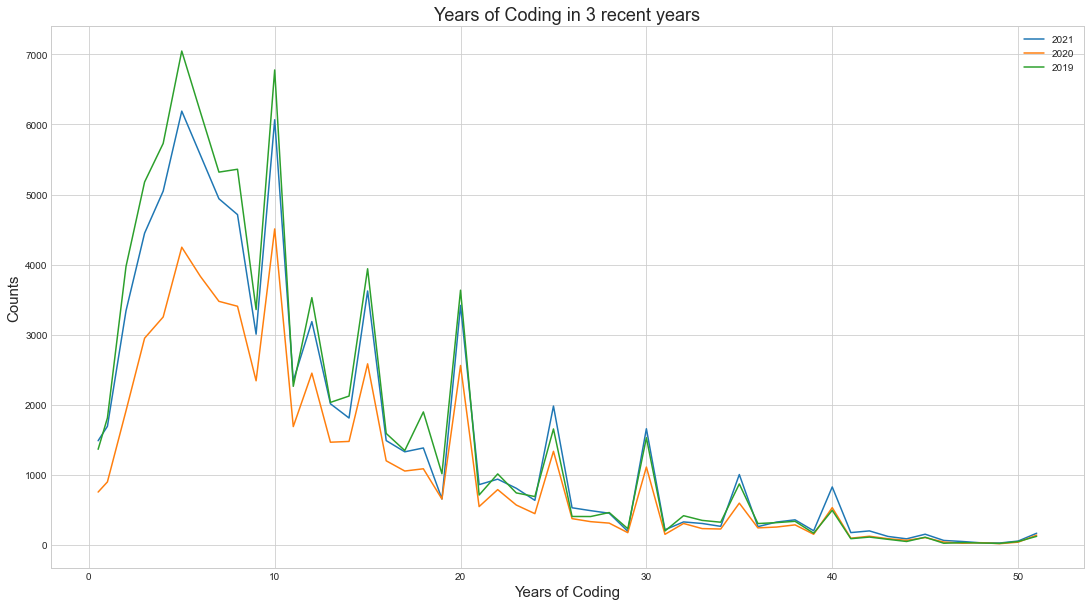

In [18]:
# Trend comparison
fig3, ax3 = plt.subplots(figsize = (15, 8))
plt.style.use(style = 'seaborn-whitegrid')

x1, y1 = get_year_value(df2021)
ax3.plot(x1, y1, label = '2021')

x2, y2 = get_year_value(df2020)
ax3.plot(x2, y2, label = '2020')

x3, y3 = get_year_value(df2019)
ax3.plot(x3, y3, label = '2019')

fig3.tight_layout()
ax3.set_xlabel('Years of Coding', fontsize = 15)
ax3.set_ylabel('Counts', fontsize = 15)
ax3.set_title('Years of Coding in 3 recent years', fontsize = 18)
plt.legend()
plt.show()

In [19]:
# Pie chart to show the distribution of age groupes over years
list_of_year_code = []
def get_year_code_pie_value(df):
    l = df.YearsCode
    year_code = {}
    year_code['Year'] = df.Year[0]
    year_code['0-10'] = len([year for year in l if year < 10])
    year_code['10-20'] = len([year for year in l if 10<= year and year <20])
    year_code['20-30'] = len([year for year in l if 20<= year and year <30])
    year_code['30-40'] = len([year for year in l if 30<= year and year <40])
    year_code['40-50'] = len([year for year in l if 40<= year and year <=50])
    year_code['>50'] = len([year for year in l if year > 50])
    list_of_year_code.append(year_code)
    
get_year_code_pie_value(df2019)
get_year_code_pie_value(df2020)
get_year_code_pie_value(df2021)

In [20]:
year_code_df = pd.DataFrame(list_of_year_code, index = (2019, 2020, 2021))

In [21]:
year_code_df

,Year,0-10,10-20,20-30,30-40,40-50,>50
2019,2019,45330,26536,9978,4846,1122,126
2020,2020,27091,18193,7468,3590,1199,143
2021,2021,40442,23920,10334,4953,1822,170


In [22]:
def get_percentage(age_group, year):
    val = year_code_df.loc[year, age_group]
    total = year_code_df.loc[year, '0-10':].sum()
    result = round(val / total *100, 2)
    return str(result)    
        
get_percentage('0-10', 2019)

'51.55'

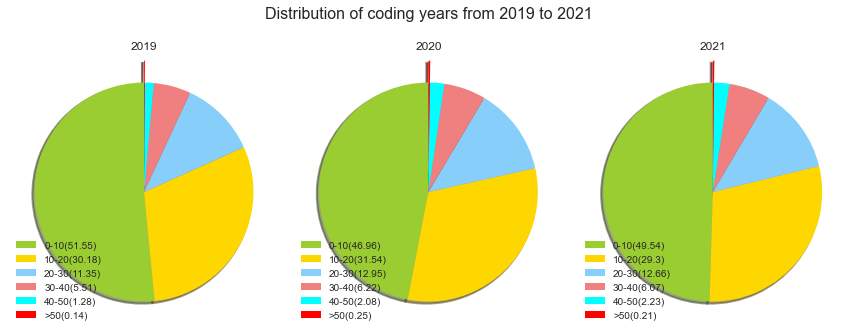

In [23]:
plt.figure(figsize = (12, 5))

ax1_ = plt.subplot(1, 3, 1)
ax2_ = plt.subplot(1, 3, 2)
ax3_ = plt.subplot(1, 3, 3)

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'cyan', 'red']
explode = [0, 0, 0, 0, 0, 0.2]

ax1_.pie(x = year_code_df.iloc[0, 1:],
         colors = colors,
         explode = explode,
         shadow = True,
         startangle=90, 
         wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
        )
ax1_.set_title('2019')

ax2_.pie(x = year_code_df.iloc[1, 1:],
         colors = colors,
         explode = explode,
         shadow = True,
         startangle=90, 
         wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
        )
ax2_.set_title('2020')

ax3_.pie(x = year_code_df.iloc[2, 1:],
         colors = colors,
         explode = explode,
         shadow = True,
         startangle=90, 
         wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
        )
ax3_.set_title('2021')


ax1_.legend(labels = [k + f'({get_percentage(k, 2019)})' for k in year_code_df.columns[1:]], loc = 'lower left')
ax2_.legend(labels = [k + f'({get_percentage(k, 2020)})' for k in year_code_df.columns[1:]], loc = 'lower left')
ax3_.legend(labels = [k + f'({get_percentage(k, 2021)})' for k in year_code_df.columns[1:]], loc = 'lower left')

plt.suptitle('Distribution of coding years from 2019 to 2021', fontsize=16)
plt.tight_layout()

#### The first time being developer 2021

In [24]:
df2021.Age1stCode = [x.strip('years') if type(x) is str else None for x in df2021.Age1stCode]
age_df = df2021.Age1stCode.value_counts().reset_index()
age_df.columns = ['Age1stCode', 'Count']

In [25]:
age_df = age_df.replace(to_replace = 'Younger than 5 ', value = '<5', regex = False)
age_df = age_df.replace(to_replace = 'Older than 64 ', value = '>64', regex = False)

age_df.head()


,Age1stCode,Count
0,11 - 17,44170
1,18 - 24,20065
2,5 - 10,11720
3,25 - 34,4199
4,35 - 44,1312


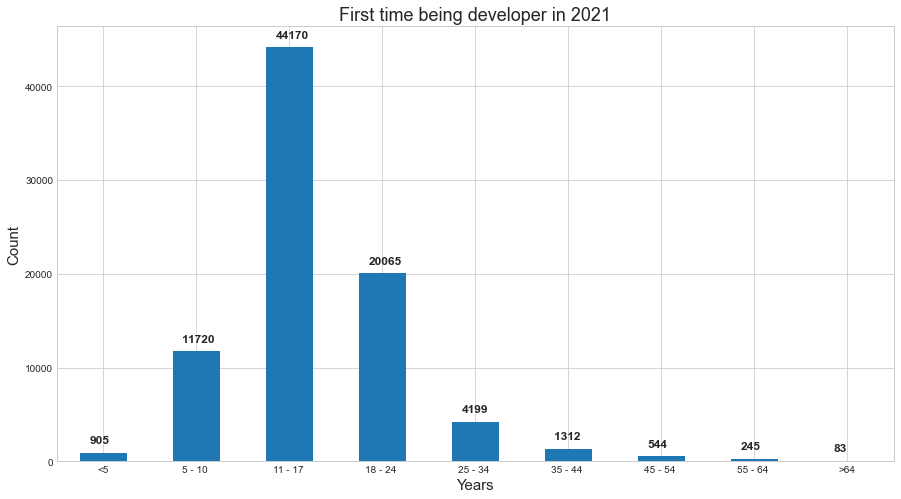

In [26]:
field = 'Age1stCode'
age_order = ['<5', '5 - 10 ', '11 - 17 ', '18 - 24 ', '25 - 34 ', '35 - 44 ', '45 - 54 ', '55 - 64 ', '>64']
age_value = [905, 11720, 44170, 20065, 4199, 1312, 544, 245, 83]

ax4 = age_df.set_index(field).loc[age_order].plot(kind = 'bar', legend = False, figsize = (15, 8))

for i, v in enumerate(age_value):
    ax4.text(i-0.15, v + 1000, str(v), fontsize = 12, fontweight = 'bold')

plt.xlabel('Years', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('First time being developer in 2021', fontsize = 18)
plt.xticks(rotation = 0)
plt.show()

#### Survey Ease

In [27]:
df2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [28]:
dfs = [df2019, df2020, df2021]

In [29]:
for df in dfs:
    df.SurveyEase = df.SurveyEase.replace('Neither easy nor difficult', 'Medium', regex = False)
    
def make_ease_df(df):
    ease_d = {}
    ease_d['Year'] = df.Year[0]
    ease_d['Easy'] = len(df.loc[df['SurveyEase'] == 'Easy'])
    ease_d['Difficult'] = len(df.loc[df['SurveyEase'] == 'Difficult'])
    ease_d['Medium'] = len(df.loc[df['SurveyEase'] == 'Medium'])

    return pd.DataFrame([ease_d])

ease_list = [make_ease_df(df) for df in dfs]
ease_df = pd.concat(ease_list, ignore_index = True)
ease_df

,Year,Easy,Difficult,Medium
0,2019,58613,1697,26771
1,2020,34626,700,16476
2,2021,63087,770,18091


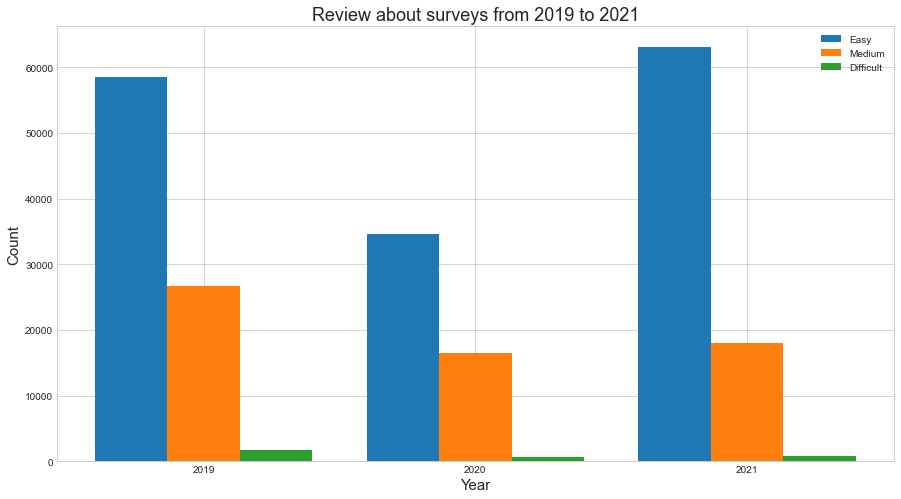

In [30]:
fig5, ax5 = plt.subplots(figsize = (15, 8))

multiple_bars(
             ax5, ease_df.Year,
             values = [ease_df.Easy, ease_df.Medium, ease_df.Difficult],
             labels = ['Easy', 'Medium', 'Difficult']
             )

plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Review about surveys from 2019 to 2021', fontsize = 18)
plt.legend()
plt.show()

#### Language have worked with 2021

In [31]:
df2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'Year'],
      dtype='object')

In [32]:
df2021.LanguageHaveWorkedWith.value_counts()

Python                                                             1337
HTML/CSS;JavaScript;Node.js;TypeScript                              811
Java                                                                715
HTML/CSS;JavaScript;PHP;SQL                                         674
C#                                                                  597
                                                                   ... 
Bash/Shell;Elixir;HTML/CSS;JavaScript;Ruby;TypeScript                 1
Assembly;Haskell;JavaScript;Python;R;SQL                              1
Bash/Shell;Delphi;HTML/CSS;JavaScript;Node.js;Python;TypeScript       1
Java;JavaScript;Kotlin;Node.js;PHP;Python;TypeScript                  1
C#;C++;F#;JavaScript;TypeScript                                       1
Name: LanguageHaveWorkedWith, Length: 28690, dtype: int64

In [33]:
languages = ['Python', 'C#', 'C', 'C++', 'HTML/CSS', 'Java', 'PHP', 'SQL', 'JavaScript', 'R']
language_value = []
for language in languages:
    language_value.append(len([x for x in df2021.LanguageHaveWorkedWith if language in str(x)]))
    
language_value

[39792, 22984, 64021, 20057, 46259, 62371, 18130, 38835, 53587, 14260]

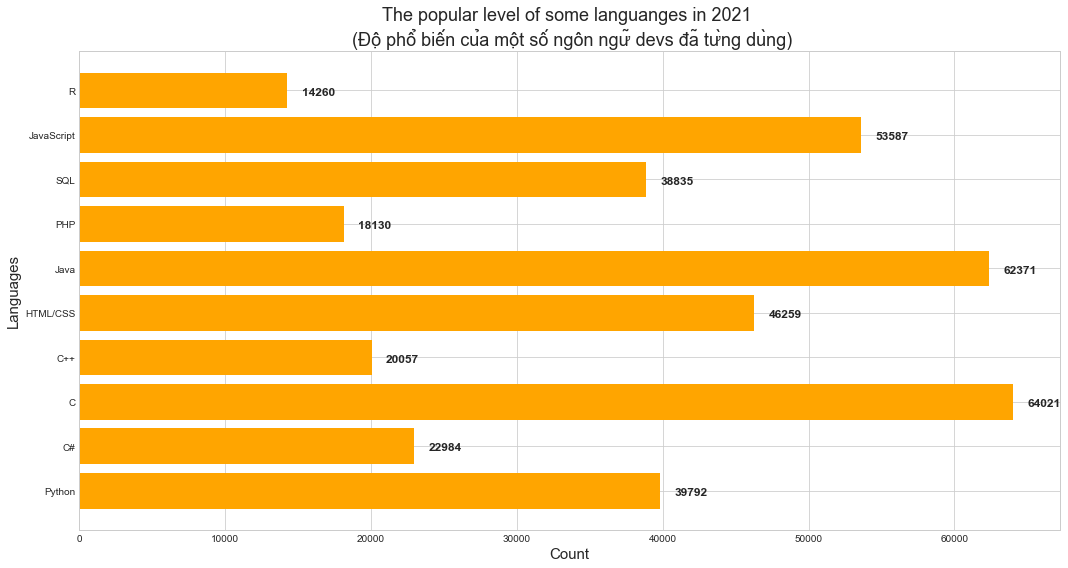

In [34]:
fig6, ax6 = plt.subplots(figsize = (15, 8))

ax6.barh(languages, language_value, color = 'orange')
for i, v in enumerate(language_value):
    ax6.text(v+1000, i-0.1, str(v), fontsize = 12, fontweight = 'bold')
    
plt.title('The popular level of some languanges in 2021 \n (Độ phổ biến của một số ngôn ngữ devs đã từng dùng)', fontsize = 18)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Languages', fontsize = 15)
plt.tight_layout()

#### Real age of devs

In [35]:
df2021.Age = [x.strip(' years old') if type(x) == str else None for x in df2021.Age]
df2021.Age =df2021.Age.replace('Under 18', '<18', regex = False)


In [36]:
df2021.Age.value_counts()

25-34           32568
18-24           20993
35-44           15183
45-54            5472
<18              5376
55-64            1819
Prefer not t      575
65                421
Name: Age, dtype: int64

In [37]:
temp_df2021 = df2021[df2021['Age'] != 'Prefer not t']

In [38]:
temp_df2021 = temp_df2021.Age.value_counts().reset_index()
temp_df2021.columns = ['Age', 'Counts']
temp_df2021

,Age,Counts
0,25-34,32568
1,18-24,20993
2,35-44,15183
3,45-54,5472
4,<18,5376
5,55-64,1819
6,65,421


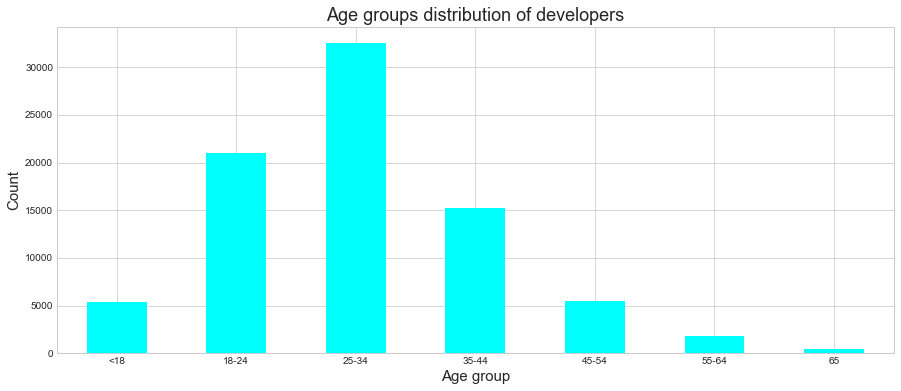

In [39]:
age_order = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65']
ax7 = temp_df2021.set_index('Age').loc[age_order].plot(kind = 'bar', legend = False, figsize = (15,6), color = 'cyan')

plt.xticks(rotation = 0)
plt.xlabel('Age group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Age groups distribution of developers', fontsize = 18)

plt.show()

In [40]:
df2021.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly', 'Year'],
      dtype='object')

#### MiscTechHaveWorkedWith

In [41]:
df2021.MiscTechHaveWorkedWith.value_counts()

.NET Framework;.NET Core / .NET 5                                                      7554
NumPy;Pandas                                                                           3339
.NET Framework                                                                         3334
React Native                                                                           2825
.NET Core / .NET 5                                                                     2564
                                                                                       ... 
Flutter;NumPy;Qt;TensorFlow                                                               1
.NET Framework;.NET Core / .NET 5;Cordova;Flutter;NumPy;Qt;TensorFlow;Torch/PyTorch       1
.NET Framework;Cordova;Flutter;Hadoop;Qt;React Native                                     1
Apache Spark;Keras;Pandas;TensorFlow;Torch/PyTorch                                        1
Flutter;Hadoop;Keras;Pandas;TensorFlow;Torch/PyTorch                            

In [42]:
misctechs = ['NumPy', 'Pandas', 'TensorFlow', '.NET Framework', '.NET Core', 'Flutter', 'Torch/PyTorch', 'Keras', 'React Native']
misctech_value = []
for misctech in misctechs:
    misctech_value.append(len([x for x in df2021.MiscTechHaveWorkedWith if misctech in str(x)]))
    
misctech_value

[16445, 13664, 8034, 16620, 15310, 6586, 4808, 4930, 7051]

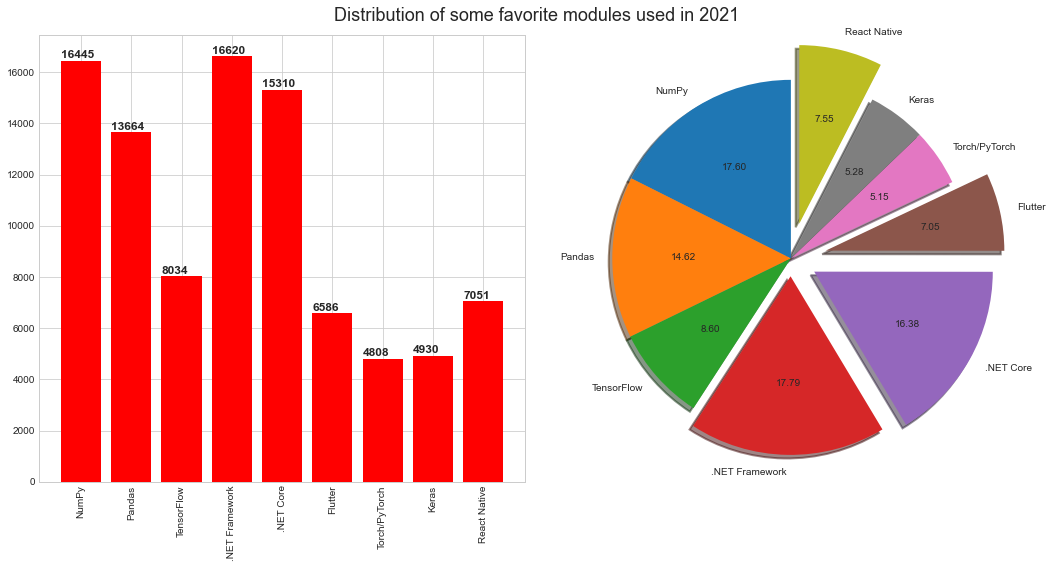

In [43]:
import matplotlib
fig8, ax8 = plt.subplots(1,2, figsize = (15, 8))

# The first: bar
ax8[0].bar(misctechs, misctech_value, color = 'red')
for i, v in enumerate(misctech_value):
    ax8[0].text(i-0.4, v+100, str(v), fontsize = 12, fontweight = 'bold')

ax8[0].set_xticks(np.arange(9))
ax8[0].set_xticklabels(misctechs, rotation = 90)

#The second: pie chart
ax8[1].pie(
         x = misctech_value,
         labels = misctechs,
         explode = (0, 0, 0, 0.1, 0.15, 0.2, 0, 0, 0.2),
         shadow = True,
         startangle=90, 
         autopct = '%.2f',
         wedgeprops={'linewidth': 2, 'linestyle': 'solid', 'antialiased': True}
        )
fig8.suptitle('Distribution of some favorite modules used in 2021', fontsize = 18)
plt.tight_layout()

#### ToolsTechWantToWorkWith

In [44]:
df2021.ToolsTechWantToWorkWith.value_counts()[10:20]

Ansible;Docker;Git;Kubernetes              821
Git;Unity 3D;Unreal Engine                 795
Git;Kubernetes                             777
Ansible;Docker;Git;Kubernetes;Terraform    707
Docker;Git;Terraform                       668
Ansible;Docker;Git                         652
Docker;Git;Unity 3D                        624
Kubernetes                                 581
Unity 3D                                   508
Deno;Docker;Git                            488
Name: ToolsTechWantToWorkWith, dtype: int64

In [45]:
tools = ['Git', 'Docker', 'Kubernetes', 'Terraform', 'Yarn', 'Pulumi', 'Unity 3D', 'Ansible']
tool_value = []
for tool in tools:
    tool_value.append(len([x for x in df2021.ToolsTechWantToWorkWith if tool in str(x)]))
    
tool_value

[58308, 37870, 21977, 7756, 9936, 901, 8285, 5876]

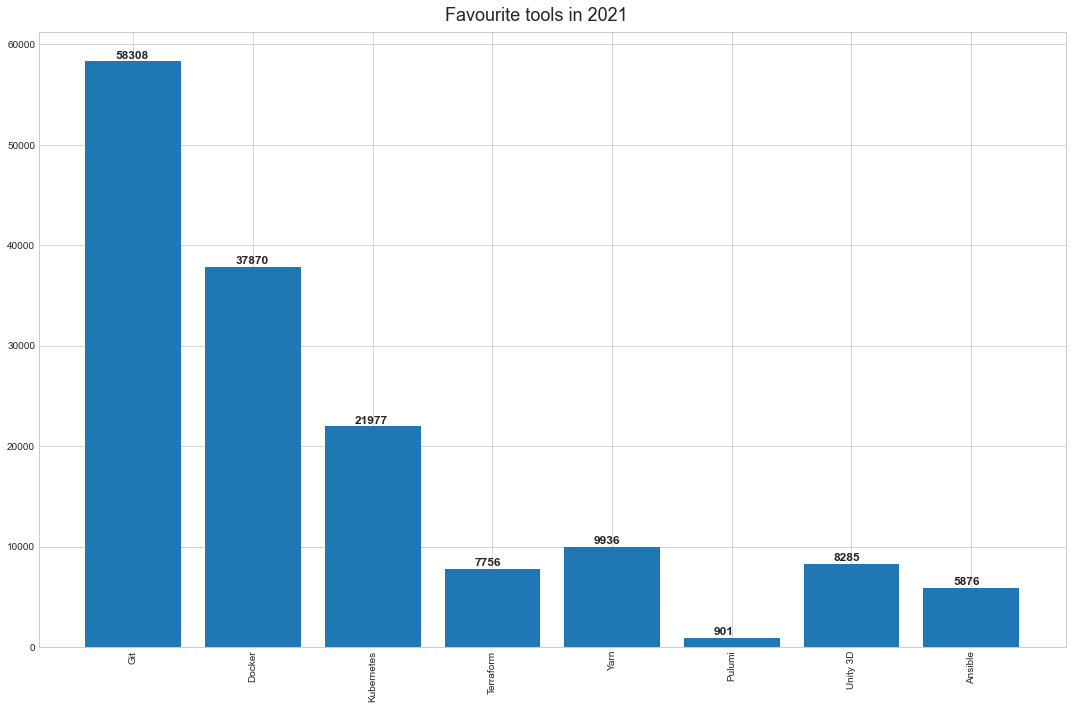

In [46]:
fig9, ax9 = plt.subplots(figsize = (15, 10))

ax9.bar(tools, tool_value)
for i, v in enumerate(tool_value):
    ax9.text(i-0.15, v+300, str(v), fontsize = 12, fontweight = 'bold')

ax9.set_xticks(np.arange(8))
ax9.set_xticklabels(tools, rotation = 90)

fig9.suptitle('Favourite tools in 2021', fontsize = 18)

plt.tight_layout()

#### DatabaseWantToWorkWith

In [47]:
df2021.DatabaseWantToWorkWith.value_counts()[:10]

PostgreSQL              4200
MySQL                   2433
Microsoft SQL Server    2396
MongoDB                 1953
PostgreSQL;Redis        1573
SQLite                  1487
PostgreSQL;SQLite       1312
Firebase                1195
MongoDB;PostgreSQL       885
MongoDB;MySQL            815
Name: DatabaseWantToWorkWith, dtype: int64

In [48]:
databases = ['PostgreSQL', 'MySQL', 'Microsoft SQL Server', 'MongoDB', 'Redis', 'Cassandra', 'SQLite', 'Firebase']
db_value = []
for database in databases:
    db_value.append(len([x for x in df2021.DatabaseWantToWorkWith if database in str(x)]))
    
db_value

[27082, 20307, 11394, 20131, 17212, 4227, 15381, 10776]

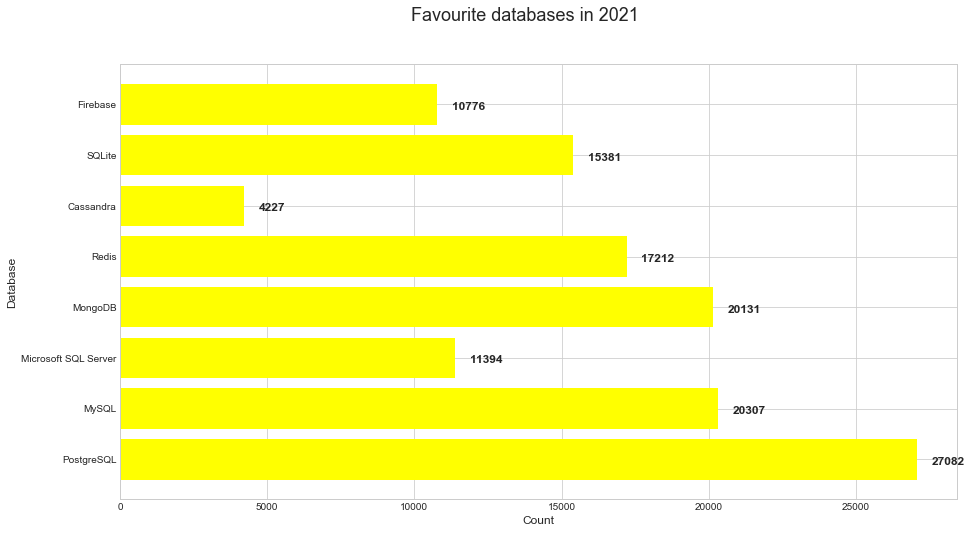

In [49]:
fig10, ax10 = plt.subplots(figsize = (15, 8))

ax10.barh(databases, db_value, color = 'yellow')

for i, v in enumerate(db_value):
    ax10.text(v+500, i-0.1, str(v), fontsize = 12, fontweight = 'bold')
    
ax10.set_xlabel('Count', fontsize = 12)
ax10.set_ylabel('Database', fontsize = 12)

fig10.suptitle('Favourite databases in 2021', fontsize = 18)
plt.show()